In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

- __url__           : contains the url of the restaurant in the zomato website            
- __address__         : contains the address of the restaurant in Bengaluru           
- __name__            : contains the name of the restaurant           
- __online_order__    : whether online ordering is available in the restaurant or not           
- __book_table__      : table book option available or not         
- __rate__            : contains the overall rating of the restaurant out of 5           
- __votes__           : contains total number of rating for the restaurant as of the above mentioned date           
- __phone__           : contains the phone number of the restaurant          
- __location__        : contains the neighborhood in which the restaurant is located           
- __rest_type__       : restaurant type           
- __dish_liked__      : dishes people liked in the restaurant           
- __cuisines__        : food styles, separated by comma              
- __approx_cost(for two people)__ : contains the approximate cost for meal for two people
- __reviews_list__    : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer       
- __menu_item__       : contains list of menus available in the restaurant              
- __listed_in(type)__ : type of meal          
- __listed_in(city)__ : contains the neighborhood in which the restaurant is listed

### Dealing with null values

- __Dish_liked__ has very 50% of null values so we will remove these columns

In [6]:
df.drop('dish_liked',inplace=True,axis=1)

- remaining all we can perform some statistics so that we can able to fill the null values
    - rate
    - phone number
    - location
    - restaruant type
    - cuisines            
    - approx_cost(for two people)
- now the issue is with rate is that its in object type so we will convert it into integer first
- issue with phone number is that every restraunt has its phone number (so we will put all the restraunt which have the their phone number as yes other as no)
- location we will try to fit that not with mode try to fit those values with the restraunt name and with dish so that we will get the exact location
- restraunt type try to fill with mode or we can same like in location
- try to fill cuisness with the mode one
- cost of two people according to data mean or median or mode

In [7]:
# here we will fill all the phono number as yes if they contain any phone number else we will make them No that means they dont contain a phone number
df['phone'].fillna('No', inplace=True)
df.loc[df['phone'] != 'No', 'phone'] = 'Yes'

In [8]:
df['location'].fillna(df['location'].mode()[0],inplace=True)

In [9]:
df.rest_type.value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [10]:
# fill the nan values of restraunt type with the mode 
df['rest_type'].fillna(df['rest_type'].mode()[0],inplace=True)

In [11]:
# fill the cuisiness with the mode once again
df['cuisines'].fillna(df['cuisines'].mode()[0],inplace=True)

In [12]:
df.rename(columns={'approx_cost(for two people)':'costing'},inplace=True)

In [13]:
df.costing.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [14]:
df['costing'] = df['costing'].str.replace(',','')

In [15]:
df['costing'].fillna(df['costing'].median(),inplace=True)

In [16]:
df['costing'] = df['costing'].astype(int)

In [17]:
# try to convert rate into integer type
# we will remove the 5 from the end because we understood that rating will be done out of 5 
df['rate'] = df.rate.str.replace('/5','')

In [18]:
df.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

<AxesSubplot:xlabel='rate', ylabel='Count'>

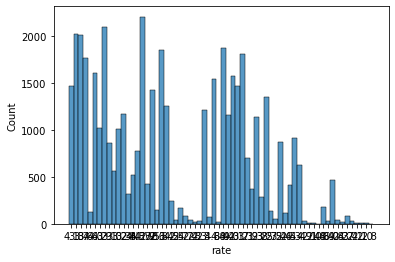

In [19]:
sns.histplot(df.rate)

In [20]:
df['rate'] = df.rate.replace('NEW',np.nan)

In [21]:
df['rate'] = df.rate.replace('-',np.nan)

In [22]:
df['rate'].fillna(df.rate.median(),inplace=True)

In [23]:
df['rate'] = df.rate.astype(float)

In [24]:
# we also dont want that url section so we can drop that
df.drop('url',inplace=True,axis=1)

In [25]:
df.isnull().sum()

address            0
name               0
online_order       0
book_table         0
rate               0
votes              0
phone              0
location           0
rest_type          0
cuisines           0
costing            0
reviews_list       0
menu_item          0
listed_in(type)    0
listed_in(city)    0
dtype: int64

### Try to find the outlier and remove them 
- we will try to find the outlier in the numerical data

<AxesSubplot:xlabel='rate'>

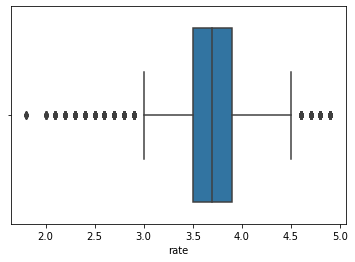

In [26]:
sns.boxplot(df.rate)

In [27]:
len(df[(df.rate>4.5) | (df.rate<3.0)])

2845

<AxesSubplot:xlabel='costing'>

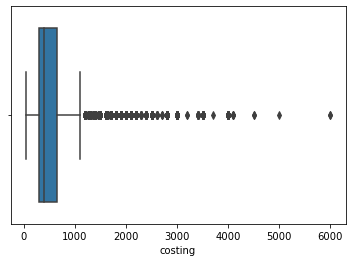

In [28]:
sns.boxplot(df.costing)

In [29]:
len(df[df.costing>1200])

3771

<AxesSubplot:xlabel='costing', ylabel='rate'>

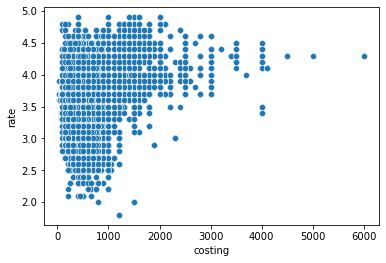

In [30]:
sns.scatterplot(df.costing,df.rate)

In [31]:
Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df = df[(df['rate'] >= lower) & (df['rate'] <= upper)]

In [32]:
Q1 = df['costing'].quantile(0.25)
Q3 = df['costing'].quantile(0.75)
IQR = Q3-Q1
lower_costing = Q1-1.5*IQR
upper_costing = Q3+1.5*IQR
df = df[(df['costing'] >= lower_costing) & (df['costing'] <= upper_costing)]

<AxesSubplot:xlabel='costing', ylabel='rate'>

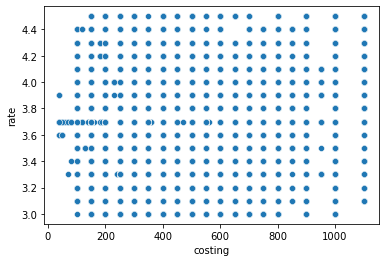

In [33]:
sns.scatterplot(df.costing,df.rate)

- we don.t need the __address__ , __name__ , __reviews__<br>
- because we dont do anything with address and name<br>
- also its not a NLP problem where we have to identify the reviews because if we see carefully reviews are according to the rating
- also we don't need __listed_in(city)__ because it tells that which is nearby our restraunt 
#### so we will drop all these

In [34]:
df.drop(['listed_in(city)','name','address','reviews_list'],inplace=True,axis=1)

#### cleaning completed....

In [35]:
df.shape

(44517, 11)

### Analysis Part

- univariate analysis : In the univariate analysis our data contain only one variable <br>
    - it is basically help to find the patterns
- Bivariate analysis : In bivariate analysis our data contain two different variable <br>
    - it is used to setup the relationship b/w variable
- Multivariate analysis: These involve more than two variable These patterns understood by mean, median, mode<br>
<br>
for univariate analysis we can use : countplot, histplot, pie chart,kdeplot<br>
for bi variate analysis we can use : scatterplot, barplot, joint plot<br>
for multivarite analysis we can use heatmap ,correlation, 2-D scatterplot<br>

### Univariate analysis

#### Does the restraunt have the booking option ?

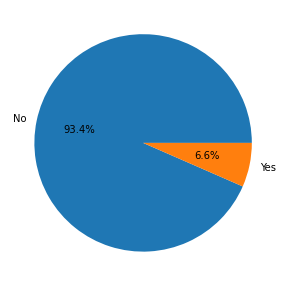

In [36]:
category = df.book_table.value_counts()
plt.figure(figsize=(5,5))
plt.pie(category,labels=category.index,autopct='%1.1f%%')
plt.show()

- most of the restraunt doesn't have a booking option

#### Does the restraunt have online order facility

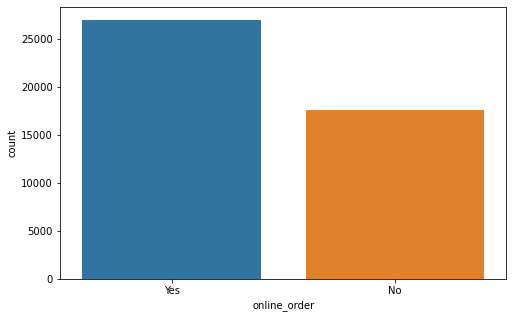

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(df.online_order)
plt.show()

- most of the restraunt have the online order facility

#### Does the restraunt have their phone number provided ?

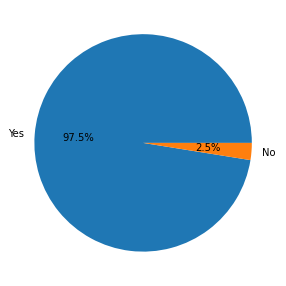

In [38]:
category_phone = df.phone.value_counts()
plt.figure(figsize=(5,5))
plt.pie(category_phone,labels = category_phone.index,autopct='%0.1f%%')
plt.show()

- most of the restraunt have their phone number provided by them

### Bivariate analysis

In [39]:
online_order = df.groupby('online_order')['rate'].mean()
online_order

online_order
No     3.649912
Yes    3.727631
Name: rate, dtype: float64

In [40]:
book_table = df.groupby('book_table')['rate'].mean()
book_table

book_table
No     3.671935
Yes    4.053322
Name: rate, dtype: float64

In [41]:
phone = df.groupby('phone')['rate'].mean()
phone

phone
No     3.699024
Yes    3.696898
Name: rate, dtype: float64

- over here we can understood that :
    - if the __online_order__ is available then rating will be good
    - also if the __book_table__ option is available then we have the rating high
    - also if the __phone number__ is available then also the rating goes high

In [42]:
df.groupby('location')['rate'].mean()[0:5].sort_values(ascending = False)

location
Basavanagudi         3.714861
Banashankari         3.680047
BTM                  3.636582
Bannerghatta Road    3.607976
Banaswadi            3.586146
Name: rate, dtype: float64

In [43]:
df.groupby('rest_type')['rate'].mean().sort_values(ascending = False)

rest_type
Cafe, Lounge                   4.400000
Casual Dining, Cafe            4.163060
Casual Dining, Microbrewery    4.150000
Pub, Casual Dining             4.126582
Casual Dining, Pub             4.120000
                                 ...   
Quick Bites, Kiosk             3.300000
Bhojanalya                     3.266667
Fine Dining                    3.160000
Dessert Parlor, Kiosk          3.100000
Bakery, Food Court             3.100000
Name: rate, Length: 74, dtype: float64

- There are too many __restraunt_type__ with same category so we will try to keep them into one single category

In [44]:
cafe = ['Cafe, Casual Dining','Cafe','Quick Bites, Cafe','Quick Bites','Cafe, Lounge']

bakery = ['Bakery','Dessert Parlor','Bakery, Dessert Parlor','Bakery, Quick Bites','Quick Bites, Bakery',
          'Food Court, Dessert Parlor','Dessert Parlor, Quick Bites','Quick Bites, Dessert Parlor','Sweet Shop, Quick Bites',
          'Quick Bites, Beverage Shop','Dessert Parlor, Sweet Shop','Sweet Shop','Quick Bites, Sweet Shop','Cafe, Dessert Parlor',
          'Dessert Parlor, Food Court', 'Dessert Parlor, Kiosk','Bakery, Kiosk']

bar = ['Bar','Casual Dining, Bar','Bar, Casual Dining','Bar, Cafe','Pub, Bar','Lounge, Bar']
pub = ['Pub' , 'Casual Dining, Pub' , 'Pub, Casual Dining','Pub, Microbrewery']
mess = ['Quick Bites, Mess', 'Bhojanalya' , 'Mess, Quick Bites','Dhaba']

cafe_bakery = ['Bakery, Cafe','Cafe, Bakery','Mess']
Beverage =['Food Court, Beverage Shop','Beverage Shop, Cafe','Beverage Shop, Dessert Parlor''Beverage Shop', 'Bakery, Beverage Shop','Beverage Shop, Quick Bites']
sweet = ['Sweet Shop, Quick Bites','Dessert Parlor, Beverage Shop','Casual Dining, Sweet Shop','Sweet Shop, Dessert Parlor',
        'Bakery, Sweet Shop','Dessert Parlor, Bakery','Dessert Parlor, Cafe']

food_court=['Food Court','Food Court, Quick Bites','Food Truck','Food Court, Casual Dining','Bakery, Food Court','Cafe, Food Court',
           'Quick Bites, Food Court',]
casual_dining =["Casual Dining",'Casual Dining, Lounge', 'Lounge', 'Casual Dining, Microbrewery', 'Quick Bites, Meat Shop', 'Quick Bites, Kiosk'
               ,'Casual Dining, Quick Bites','Fine Dining']

def change_rest(x):
    if x in cafe :
        return "Cafe"
    elif x in bakery:
        return "bakery"
    elif x in bar:
        return "bar"
    elif x in pub :
        return "pub"
    elif x in cafe_bakery:
        return "cafe & bakery"
    elif x in mess:
        return "mess"
    elif x in Beverage:
        return "Bevarage"
    elif x in sweet :
        return "sweet"
    elif x in food_court:
        return "food_court"
    elif x in casual_dining:
        return "casual_dining"
    else:
        return "others"
    
df['rest_type'] = df['rest_type'].apply(lambda x : change_rest(x))

In [45]:
df.groupby('rest_type')['rate'].mean().sort_values(ascending=False)

rest_type
pub              3.998712
sweet            3.924702
bar              3.796166
cafe & bakery    3.786858
casual_dining    3.757055
bakery           3.749836
Bevarage         3.723837
others           3.666617
Cafe             3.661807
food_court       3.599072
mess             3.508000
Name: rate, dtype: float64

In [46]:
df.groupby('listed_in(type)')['rate'].mean().sort_values(ascending=False)

listed_in(type)
Cafes                 3.872376
Buffet                3.859893
Drinks & nightlife    3.843403
Pubs and bars         3.817213
Desserts              3.763353
Delivery              3.682475
Dine-out              3.677717
Name: rate, dtype: float64

In [47]:
df.head(2)

,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,costing,menu_item,listed_in(type)
0,Yes,Yes,4.1,775,Yes,Banashankari,casual_dining,"North Indian, Mughlai, Chinese",800,[],Buffet
1,Yes,No,4.1,787,Yes,Banashankari,casual_dining,"Chinese, North Indian, Thai",800,[],Buffet


In [48]:
def name_array_length(arr):
    if len(arr) > 2:
        return 'menu available'
    else:
        return 'menu not availabe'
df['menu'] = df['menu_item'].apply(name_array_length)

In [49]:
df.sample(5)

,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,costing,menu_item,listed_in(type),menu
49085,Yes,No,4.0,34,Yes,Sarjapur Road,Cafe,"Cafe, Rolls, Fast Food",200,"['Chai with Bun Egg Bhurji', 'Chai with Parath...",Delivery,menu available
17692,Yes,No,3.9,83,Yes,CV Raman Nagar,Cafe,North Indian,300,[],Delivery,menu not availabe
24100,Yes,No,3.7,0,Yes,Banaswadi,casual_dining,"Andhra, North Indian, Chinese, Seafood",500,[],Delivery,menu not availabe
42084,No,No,3.7,0,Yes,Brookefield,casual_dining,"North Indian, Chinese",600,[],Dine-out,menu not availabe
12694,Yes,No,3.7,66,Yes,Ulsoor,Cafe,"Cafe, Mediterranean, Italian, Pizza, Continental",800,"['Parmigiano Chicken', 'Classic Margherlta', '...",Dine-out,menu available


- we can drop the menu_item column because we have extract the info from it

In [50]:
df.drop(['menu_item'],inplace=True,axis=1)

In [51]:
df.corr()

,rate,votes,costing
rate,1.000000,0.421582,0.279763
votes,0.421582,1.000000,0.341863
costing,0.279763,0.341863,1.000000


In [52]:
df['listed_in(type)'].value_counts()

Delivery              23732
Dine-out              14926
Desserts               3400
Cafes                  1553
Buffet                  374
Drinks & nightlife      288
Pubs and bars           244
Name: listed_in(type), dtype: int64

- now the __rest_type__ and __listed_in(type)__ are approximatley same so we will drop one of that 

In [53]:
df.drop('rest_type',inplace=True,axis=1)

In [54]:
df.head()

,online_order,book_table,rate,votes,phone,location,cuisines,costing,listed_in(type),menu
0,Yes,Yes,4.1,775,Yes,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet,menu not availabe
1,Yes,No,4.1,787,Yes,Banashankari,"Chinese, North Indian, Thai",800,Buffet,menu not availabe
2,Yes,No,3.8,918,Yes,Banashankari,"Cafe, Mexican, Italian",800,Buffet,menu not availabe
3,No,No,3.7,88,Yes,Banashankari,"South Indian, North Indian",300,Buffet,menu not availabe
4,No,No,3.8,166,Yes,Basavanagudi,"North Indian, Rajasthani",600,Buffet,menu not availabe


In [55]:
df.cuisines.value_counts()

North Indian                                                 2658
North Indian, Chinese                                        2099
South Indian                                                 1780
Biryani                                                       890
Bakery, Desserts                                              881
                                                             ... 
Biryani, Bengali                                                1
Hyderabadi, Biryani, North Indian, Chinese                      1
North Indian, Chinese, Continental, Italian, South Indian       1
Arabian, North Indian, Chinese                                  1
North Indian, Chinese, Arabian, Momos                           1
Name: cuisines, Length: 2296, dtype: int64

### Label encoding

- We can use lable encoding and one hot encoding <br>
- In one hot encoding we basically increase the dimension of the data and it is used when we have the very less category in columns <br>
- Label encoding we used because it doesnot increase the dimension of the data also it label the category in the same column so easy to understand

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
label = LabelEncoder()